<a href="https://colab.research.google.com/github/sarikasea/Python/blob/main/MatplotLib_Seaborn_and_Folium_Car_Sales_in_Recessions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install folium

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [5]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"


In [6]:
import urllib.request

url = filepath  # Replace with the URL of the file you want to download
filename = 'automobiles.csv'  # Replace with the desired filename

try:
    urllib.request.urlretrieve(url, filename)
    print(f"File downloaded successfully to {filename}")
except Exception as e:
    print(f"Error downloading file: {e}")

File downloaded successfully to automobiles.csv


In [9]:
df = pd.read_csv('automobiles.csv')

In [10]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [11]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


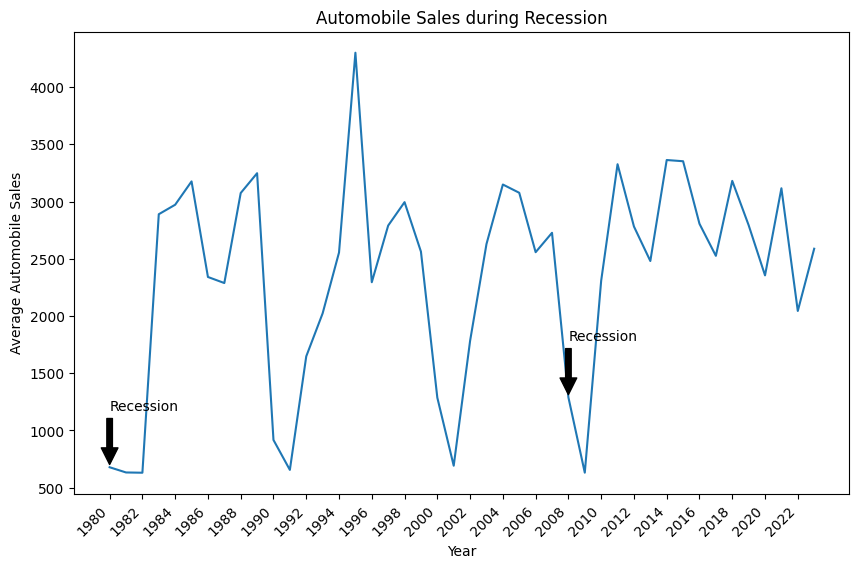

In [15]:
df_grouped_year = df.groupby('Year')['Automobile_Sales'].mean()

plt.figure(figsize=(10, 6))
df_grouped_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Automobile Sales during Recession')

# Set x-ticks to show all years, spaced out
plt.xticks(df_grouped_year.index[::2], rotation=45, ha='right') # Show every other year for spacing

# Add annotations for recession years (assuming 1980 and 2008 were recession years based on the data)
# You might need to adjust these years based on the actual recession data in your df
recession_years = [1980, 2008]
for year in recession_years:
    if year in df_grouped_year.index:
        plt.annotate('Recession', xy=(year, df_grouped_year.loc[year]), xytext=(year, df_grouped_year.loc[year] + 500),
                     arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

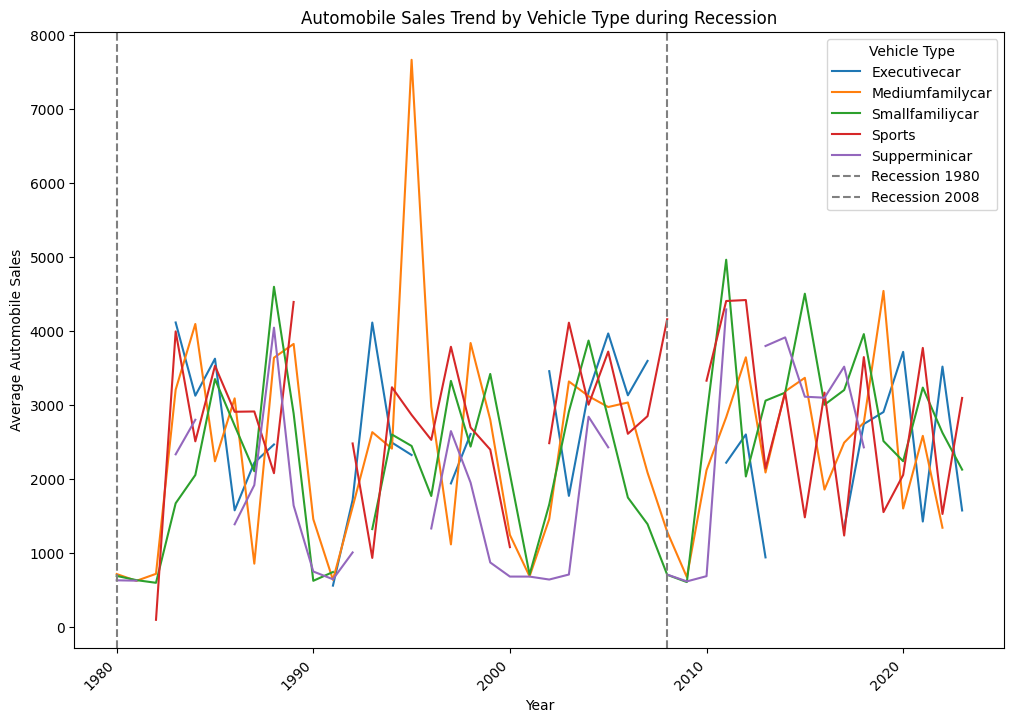

In [16]:
df_grouped_vehicle = df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].mean().unstack()

plt.figure(figsize=(12, 8))
df_grouped_vehicle.plot(kind='line', ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Automobile Sales Trend by Vehicle Type during Recession')

# Add annotations for recession years (assuming 1980 and 2008 were recession years based on the data)
recession_years = [1980, 2008]
for year in recession_years:
    if year in df_grouped_vehicle.index:
        plt.axvline(x=year, color='grey', linestyle='--', label=f'Recession {year}')

plt.legend(title='Vehicle Type')
plt.xticks(rotation=45, ha='right')
plt.show()

Based on the line chart, it appears that different vehicle types have varying sales trends during recession periods. Some vehicle types seem to experience a more significant drop in sales during recessions compared to others. You can observe the dips in the lines around the recession years (marked by the grey dashed lines) for each vehicle type to see the impact.

TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

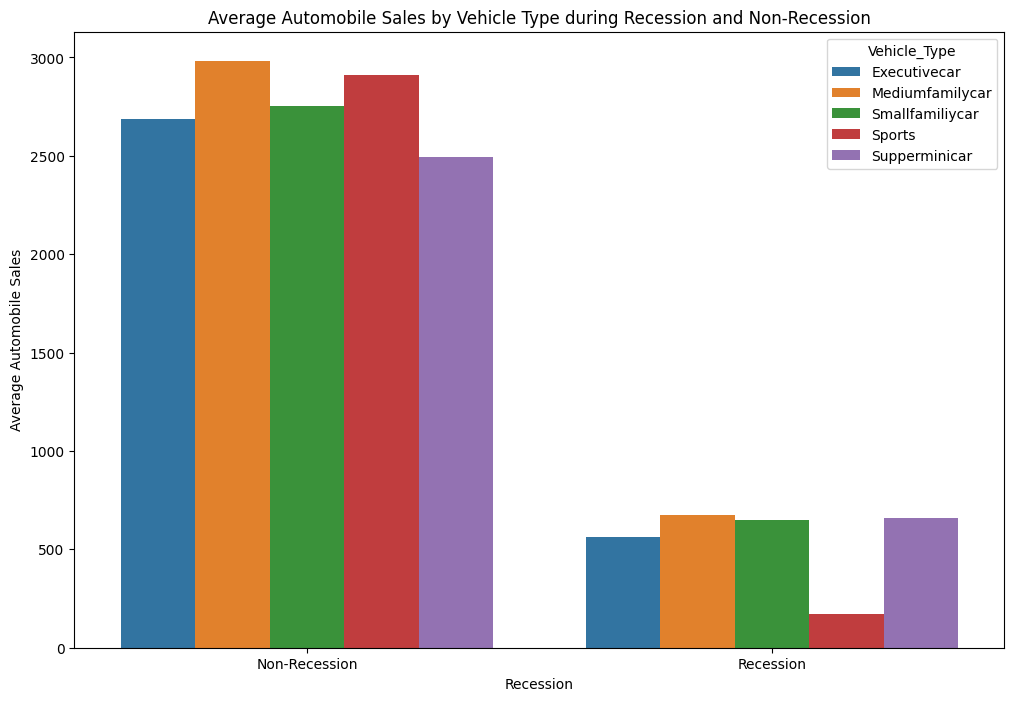

In [17]:
# Group by Recession and Vehicle_Type and calculate the mean of Automobile_Sales
df_grouped_recession_vehicle = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=df_grouped_recession_vehicle)
plt.xlabel('Recession')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales by Vehicle Type during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

Now you want to compare the sales of different vehicle types during a recession and a non-recession period

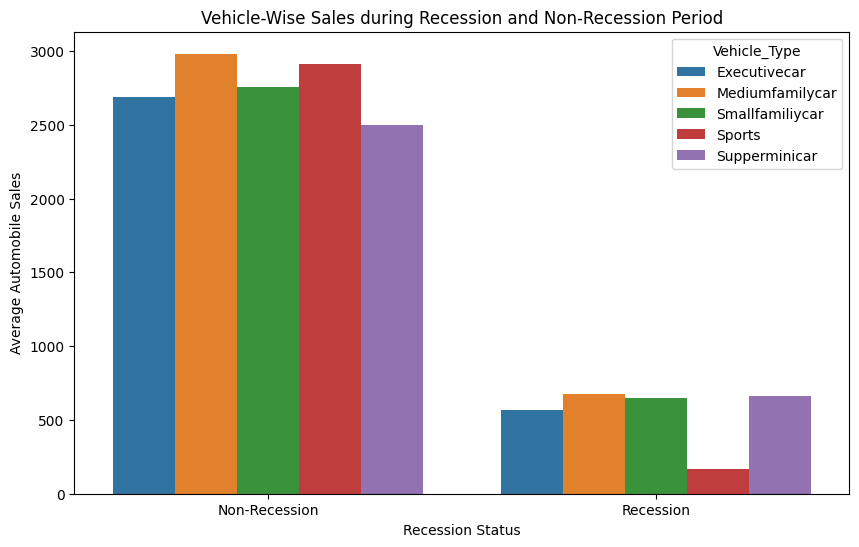

In [18]:
# Group by Recession and Vehicle_Type and calculate the mean of Automobile_Sales
grouped_df = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=grouped_df)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession Status')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

average automobile sales across all vehicle types during recession periods compared to non-recession periods. The bars representing sales during recession (labeled 'Recession') are considerably shorter than the bars for non-recession periods.
Impact Across Vehicle Types: While all vehicle types see a decline, the magnitude of the drop might vary slightly between them. You can observe the relative heights of the bars within each vehicle type group to see which types were potentially hit harder in terms of average sales during recessions.
Overall Trend: The chart clearly illustrates that economic recessions have a strong negative correlation with automobile sales, leading to a substantial decrease in demand across the board.
This visualization effectively highlights the vulnerability of the automobile market to economic downturns.


TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period

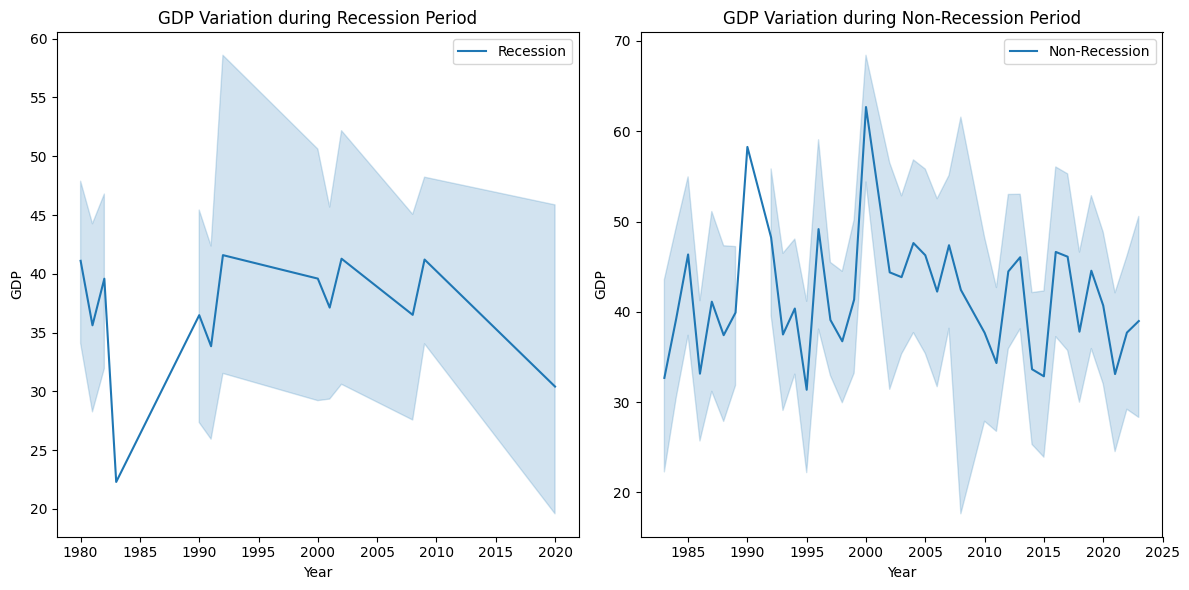

In [19]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

#Figure
fig=plt.figure(figsize=(12, 6))

#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot).

#Plot for recession data
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

#Plot for non-recession data
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales

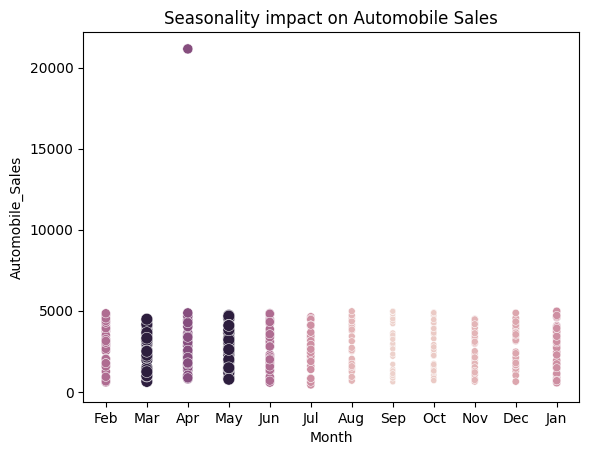

In [20]:
non_rec_data = df[df['Recession'] == 0]

size=non_rec_data['Seasonality_Weight'] #for bubble effect

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

### Inference
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April<br><br>


TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

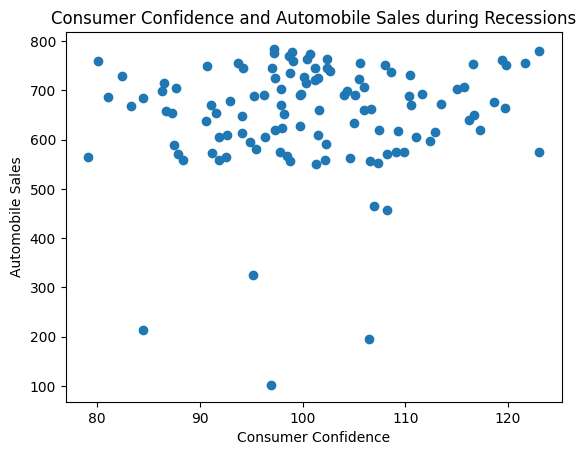

In [21]:
#Create dataframes for recession period
rec_data = df[df['Recession'] == 1]

plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()


 ### How does the average vehicle price relate to the sales volume during recessions?
 <br> Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'


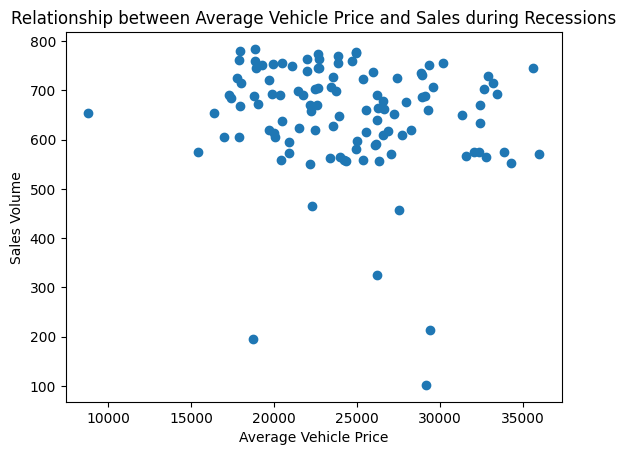

In [22]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel('Average Vehicle Price')
plt.ylabel('Sales Volume')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods?


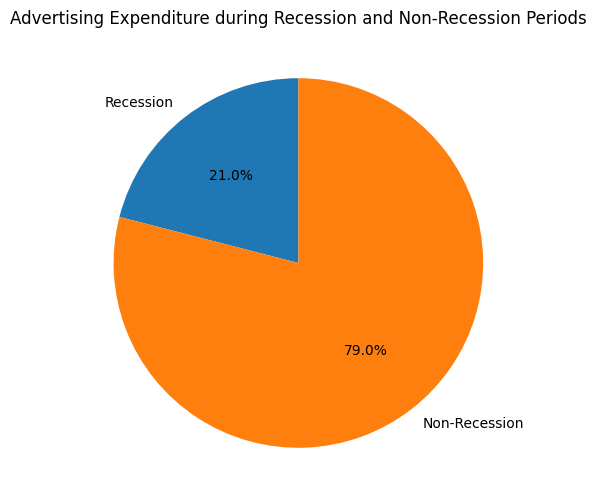

In [23]:
# Filter the data
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

It seems XYZAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!

### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions?

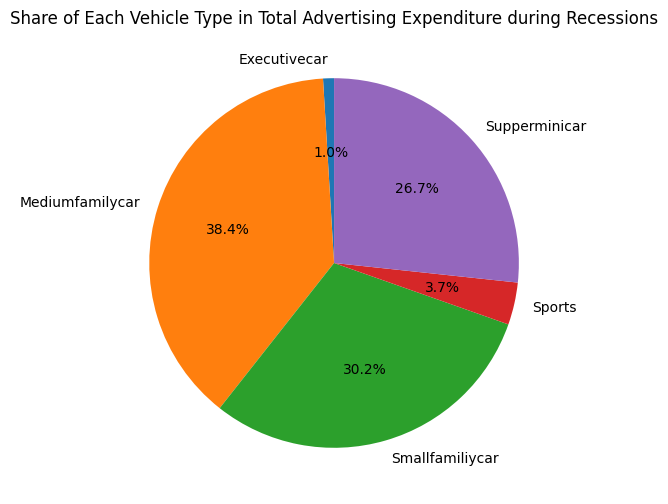

In [24]:
# Filter the data
Rdata = df[df['Recession'] == 1]

# Calculate the total advertising expenditure by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(10, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Advertising Expenditure during Recessions')

plt.show()

Inference
During recession the advertisements were mostly focued on low price range vehicle. A wise decision!

 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


/tmp/ipython-input-1439036654.py:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


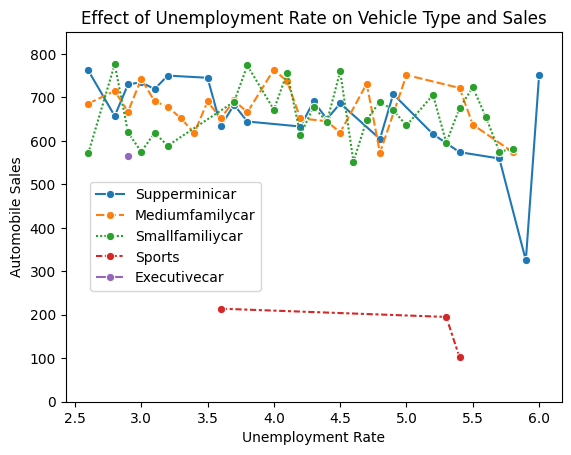

In [25]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.show()

During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar